### 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv('./train_santander.csv', encoding='latin-1')
print('dataset shape :', cust_df.shape)
cust_df.head(3)

dataset shape : (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())

unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1]['TARGET'].count()
total_cnt = cust_df['TARGET'].count()

print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
print(cust_df['var3'].value_counts()[:10])

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64


In [6]:
# var3 피처 값 및 ID 피처 드롭
cust_df['var3'].replace(-999999, 2, inplace = True)
cust_df.drop('ID', axis = 1, inplace = True)

# 피처 세트와 레이블 세트 분리, 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape : {0}'.format(X_features.shape))

피처 데이터 shape : (76020, 369)


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size = 0.2, random_state = 0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape : {0}, 테스트 세트 Shape : {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts() / train_cnt)
print('테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts() / test_cnt)

학습 세트 Shape : (60816, 369), 테스트 세트 Shape : (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random_state는 예제 수행시마다 동일 예측 결과를 위해 설정
xgb_clf = XGBClassifier(n_estimators = 500, random_state = 156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [14]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators = 100)

params = {'max_depth' : [5, 7], 'min_child_weight' : [1, 3], 'colsample_bytree' : [0.5, 0.75]}

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위해 cv를 지정하지 않음
gridcv = GridSearchCV(xgb_clf, param_grid = params)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.80038	validation_1-auc:0.79818
[1]	validation_0-auc:0.81995	validation_1-auc:0.81649
[2]	validation_0-auc:0.82649	validation_1-auc:0.82081
[3]	validation_0-auc:0.83183	validation_1-auc:0.82450
[4]	validation_0-auc:0.83650	validation_1-auc:0.82830
[5]	validation_0-auc:0.83943	validation_1-auc:0.83588
[6]	validation_0-auc:0.83793	validation_1-auc:0.83169
[7]	validation_0-auc:0.84466	validation_1-auc:0.83748
[8]	validation_0-auc:0.84785	validation_1-auc:0.83735
[9]	validation_0-auc:0.84684	validation_1-auc:0.83529
[10]	validation_0-auc:0.84625	validation_1-auc:0.83278
[11]	validation_0-auc:0.84769	validation_1-auc:0.83157
[12]	validation_0-auc:0.85326	validation_1-auc:0.83573
[13]	validation_0-auc:0.85730	validation_1-auc:0.83839
[14]	validation_0-auc:0.85934	validation_1-auc:0.83892
[15]	validation_0-auc:0.86089	validation_1-auc:0.83844
[16]	validation_0-auc:0.86256	validation_1-auc:0.83932
[17]	validation_0-auc:0.86398	validation_1-auc:0.83871
[18]	validation_0-au

[17]	validation_0-auc:0.86582	validation_1-auc:0.84054
[18]	validation_0-auc:0.86660	validation_1-auc:0.84019
[19]	validation_0-auc:0.86816	validation_1-auc:0.83925
[20]	validation_0-auc:0.86872	validation_1-auc:0.83902
[21]	validation_0-auc:0.86926	validation_1-auc:0.83853
[22]	validation_0-auc:0.87020	validation_1-auc:0.83887
[23]	validation_0-auc:0.87138	validation_1-auc:0.83898
[24]	validation_0-auc:0.87192	validation_1-auc:0.83943
[25]	validation_0-auc:0.87267	validation_1-auc:0.83958
[26]	validation_0-auc:0.87390	validation_1-auc:0.83941
[27]	validation_0-auc:0.87466	validation_1-auc:0.83954
[28]	validation_0-auc:0.87477	validation_1-auc:0.83958
[29]	validation_0-auc:0.87518	validation_1-auc:0.83951
[30]	validation_0-auc:0.87583	validation_1-auc:0.83913
[31]	validation_0-auc:0.87665	validation_1-auc:0.83859
[32]	validation_0-auc:0.87711	validation_1-auc:0.83895
[33]	validation_0-auc:0.87737	validation_1-auc:0.83902
[34]	validation_0-auc:0.87765	validation_1-auc:0.83873
[35]	valid

[17]	validation_0-auc:0.86261	validation_1-auc:0.84241
[18]	validation_0-auc:0.86332	validation_1-auc:0.84189
[19]	validation_0-auc:0.86468	validation_1-auc:0.84155
[20]	validation_0-auc:0.86554	validation_1-auc:0.84142
[21]	validation_0-auc:0.86602	validation_1-auc:0.84093
[22]	validation_0-auc:0.86679	validation_1-auc:0.84153
[23]	validation_0-auc:0.86744	validation_1-auc:0.84176
[24]	validation_0-auc:0.86781	validation_1-auc:0.84101
[25]	validation_0-auc:0.86901	validation_1-auc:0.84009
[26]	validation_0-auc:0.87031	validation_1-auc:0.84028
[27]	validation_0-auc:0.87125	validation_1-auc:0.84040
[28]	validation_0-auc:0.87151	validation_1-auc:0.84015
[29]	validation_0-auc:0.87236	validation_1-auc:0.83980
[30]	validation_0-auc:0.87280	validation_1-auc:0.83951
[31]	validation_0-auc:0.87337	validation_1-auc:0.83966
[32]	validation_0-auc:0.87373	validation_1-auc:0.83976
[33]	validation_0-auc:0.87409	validation_1-auc:0.83945
[34]	validation_0-auc:0.87527	validation_1-auc:0.83946
[35]	valid

[21]	validation_0-auc:0.86649	validation_1-auc:0.84154
[22]	validation_0-auc:0.86789	validation_1-auc:0.84130
[23]	validation_0-auc:0.86875	validation_1-auc:0.84070
[24]	validation_0-auc:0.86963	validation_1-auc:0.84129
[25]	validation_0-auc:0.87029	validation_1-auc:0.84082
[26]	validation_0-auc:0.87152	validation_1-auc:0.83990
[27]	validation_0-auc:0.87202	validation_1-auc:0.83942
[28]	validation_0-auc:0.87225	validation_1-auc:0.83959
[29]	validation_0-auc:0.87310	validation_1-auc:0.83948
[30]	validation_0-auc:0.87336	validation_1-auc:0.83930
[31]	validation_0-auc:0.87396	validation_1-auc:0.83927
[32]	validation_0-auc:0.87499	validation_1-auc:0.83895
[33]	validation_0-auc:0.87511	validation_1-auc:0.83896
[34]	validation_0-auc:0.87595	validation_1-auc:0.83959
[35]	validation_0-auc:0.87700	validation_1-auc:0.83873
[36]	validation_0-auc:0.87751	validation_1-auc:0.83886
[37]	validation_0-auc:0.87792	validation_1-auc:0.83901
[38]	validation_0-auc:0.87853	validation_1-auc:0.83911
[39]	valid

[30]	validation_0-auc:0.90069	validation_1-auc:0.83884
[31]	validation_0-auc:0.90132	validation_1-auc:0.83787
[32]	validation_0-auc:0.90165	validation_1-auc:0.83734
[33]	validation_0-auc:0.90202	validation_1-auc:0.83749
[34]	validation_0-auc:0.90287	validation_1-auc:0.83740
[35]	validation_0-auc:0.90325	validation_1-auc:0.83765
[36]	validation_0-auc:0.90351	validation_1-auc:0.83767
[37]	validation_0-auc:0.90373	validation_1-auc:0.83737
[38]	validation_0-auc:0.90389	validation_1-auc:0.83727
[39]	validation_0-auc:0.90420	validation_1-auc:0.83715
[40]	validation_0-auc:0.90430	validation_1-auc:0.83716
[41]	validation_0-auc:0.90535	validation_1-auc:0.83669
[42]	validation_0-auc:0.90598	validation_1-auc:0.83662
[43]	validation_0-auc:0.90643	validation_1-auc:0.83646
[0]	validation_0-auc:0.82030	validation_1-auc:0.81629
[1]	validation_0-auc:0.83024	validation_1-auc:0.82173
[2]	validation_0-auc:0.83603	validation_1-auc:0.82795
[3]	validation_0-auc:0.83914	validation_1-auc:0.83037
[4]	validation

[2]	validation_0-auc:0.83731	validation_1-auc:0.82740
[3]	validation_0-auc:0.84251	validation_1-auc:0.82901
[4]	validation_0-auc:0.84709	validation_1-auc:0.82948
[5]	validation_0-auc:0.85009	validation_1-auc:0.83382
[6]	validation_0-auc:0.85057	validation_1-auc:0.82627
[7]	validation_0-auc:0.85827	validation_1-auc:0.83007
[8]	validation_0-auc:0.86455	validation_1-auc:0.83361
[9]	validation_0-auc:0.86340	validation_1-auc:0.83205
[10]	validation_0-auc:0.86263	validation_1-auc:0.83078
[11]	validation_0-auc:0.86316	validation_1-auc:0.82911
[12]	validation_0-auc:0.86958	validation_1-auc:0.83375
[13]	validation_0-auc:0.87384	validation_1-auc:0.83608
[14]	validation_0-auc:0.87670	validation_1-auc:0.83822
[15]	validation_0-auc:0.87878	validation_1-auc:0.83613
[16]	validation_0-auc:0.88076	validation_1-auc:0.83743
[17]	validation_0-auc:0.88216	validation_1-auc:0.83827
[18]	validation_0-auc:0.88296	validation_1-auc:0.83785
[19]	validation_0-auc:0.88518	validation_1-auc:0.83676
[20]	validation_0-

[10]	validation_0-auc:0.86632	validation_1-auc:0.83648
[11]	validation_0-auc:0.86635	validation_1-auc:0.83540
[12]	validation_0-auc:0.87323	validation_1-auc:0.83879
[13]	validation_0-auc:0.87674	validation_1-auc:0.84000
[14]	validation_0-auc:0.87881	validation_1-auc:0.84150
[15]	validation_0-auc:0.88009	validation_1-auc:0.84063
[16]	validation_0-auc:0.88204	validation_1-auc:0.84153
[17]	validation_0-auc:0.88346	validation_1-auc:0.84109
[18]	validation_0-auc:0.88420	validation_1-auc:0.84169
[19]	validation_0-auc:0.88585	validation_1-auc:0.84125
[20]	validation_0-auc:0.88654	validation_1-auc:0.84099
[21]	validation_0-auc:0.88767	validation_1-auc:0.83974
[22]	validation_0-auc:0.88918	validation_1-auc:0.84061
[23]	validation_0-auc:0.89028	validation_1-auc:0.84014
[24]	validation_0-auc:0.89069	validation_1-auc:0.84011
[25]	validation_0-auc:0.89114	validation_1-auc:0.83984
[26]	validation_0-auc:0.89183	validation_1-auc:0.83918
[27]	validation_0-auc:0.89273	validation_1-auc:0.83956
[28]	valid

[14]	validation_0-auc:0.86206	validation_1-auc:0.84135
[15]	validation_0-auc:0.86440	validation_1-auc:0.84157
[16]	validation_0-auc:0.86560	validation_1-auc:0.84169
[17]	validation_0-auc:0.86681	validation_1-auc:0.84139
[18]	validation_0-auc:0.86739	validation_1-auc:0.84111
[19]	validation_0-auc:0.86874	validation_1-auc:0.84064
[20]	validation_0-auc:0.86966	validation_1-auc:0.84041
[21]	validation_0-auc:0.87071	validation_1-auc:0.83990
[22]	validation_0-auc:0.87179	validation_1-auc:0.83893
[23]	validation_0-auc:0.87304	validation_1-auc:0.83900
[24]	validation_0-auc:0.87385	validation_1-auc:0.83901
[25]	validation_0-auc:0.87489	validation_1-auc:0.83932
[26]	validation_0-auc:0.87614	validation_1-auc:0.83909
[27]	validation_0-auc:0.87651	validation_1-auc:0.83900
[28]	validation_0-auc:0.87698	validation_1-auc:0.83846
[29]	validation_0-auc:0.87704	validation_1-auc:0.83850
[30]	validation_0-auc:0.87734	validation_1-auc:0.83887
[31]	validation_0-auc:0.87765	validation_1-auc:0.83864
[32]	valid

[30]	validation_0-auc:0.87302	validation_1-auc:0.83694
[31]	validation_0-auc:0.87365	validation_1-auc:0.83649
[32]	validation_0-auc:0.87422	validation_1-auc:0.83628
[33]	validation_0-auc:0.87448	validation_1-auc:0.83619
[34]	validation_0-auc:0.87487	validation_1-auc:0.83614
[35]	validation_0-auc:0.87491	validation_1-auc:0.83610
[36]	validation_0-auc:0.87506	validation_1-auc:0.83601
[37]	validation_0-auc:0.87634	validation_1-auc:0.83629
[38]	validation_0-auc:0.87671	validation_1-auc:0.83625
[39]	validation_0-auc:0.87679	validation_1-auc:0.83635
[40]	validation_0-auc:0.87704	validation_1-auc:0.83598
[41]	validation_0-auc:0.87730	validation_1-auc:0.83614
[42]	validation_0-auc:0.87814	validation_1-auc:0.83590
[43]	validation_0-auc:0.87834	validation_1-auc:0.83566
[44]	validation_0-auc:0.87931	validation_1-auc:0.83570
[0]	validation_0-auc:0.81436	validation_1-auc:0.81252
[1]	validation_0-auc:0.82627	validation_1-auc:0.81794
[2]	validation_0-auc:0.82922	validation_1-auc:0.82212
[3]	validatio

[44]	validation_0-auc:0.87437	validation_1-auc:0.83775
[45]	validation_0-auc:0.87449	validation_1-auc:0.83769
[46]	validation_0-auc:0.87566	validation_1-auc:0.83731
[47]	validation_0-auc:0.87629	validation_1-auc:0.83738
[0]	validation_0-auc:0.81985	validation_1-auc:0.81459
[1]	validation_0-auc:0.82656	validation_1-auc:0.82093
[2]	validation_0-auc:0.83133	validation_1-auc:0.82408
[3]	validation_0-auc:0.83445	validation_1-auc:0.82663
[4]	validation_0-auc:0.83803	validation_1-auc:0.82830
[5]	validation_0-auc:0.84362	validation_1-auc:0.83190
[6]	validation_0-auc:0.84552	validation_1-auc:0.83366
[7]	validation_0-auc:0.84782	validation_1-auc:0.83332
[8]	validation_0-auc:0.85066	validation_1-auc:0.83346
[9]	validation_0-auc:0.85283	validation_1-auc:0.83601
[10]	validation_0-auc:0.85464	validation_1-auc:0.83901
[11]	validation_0-auc:0.85412	validation_1-auc:0.83674
[12]	validation_0-auc:0.85801	validation_1-auc:0.83879
[13]	validation_0-auc:0.86008	validation_1-auc:0.84027
[14]	validation_0-au

[9]	validation_0-auc:0.86928	validation_1-auc:0.83872
[10]	validation_0-auc:0.87174	validation_1-auc:0.83869
[11]	validation_0-auc:0.87115	validation_1-auc:0.83684
[12]	validation_0-auc:0.87911	validation_1-auc:0.83800
[13]	validation_0-auc:0.88263	validation_1-auc:0.83817
[14]	validation_0-auc:0.88487	validation_1-auc:0.83946
[15]	validation_0-auc:0.88721	validation_1-auc:0.83726
[16]	validation_0-auc:0.89026	validation_1-auc:0.83736
[17]	validation_0-auc:0.89140	validation_1-auc:0.83689
[18]	validation_0-auc:0.89265	validation_1-auc:0.83649
[19]	validation_0-auc:0.89387	validation_1-auc:0.83586
[20]	validation_0-auc:0.89470	validation_1-auc:0.83481
[21]	validation_0-auc:0.89514	validation_1-auc:0.83561
[22]	validation_0-auc:0.89677	validation_1-auc:0.83524
[23]	validation_0-auc:0.89722	validation_1-auc:0.83438
[24]	validation_0-auc:0.89786	validation_1-auc:0.83507
[25]	validation_0-auc:0.89812	validation_1-auc:0.83501
[26]	validation_0-auc:0.90015	validation_1-auc:0.83488
[27]	valida

[24]	validation_0-auc:0.88823	validation_1-auc:0.83571
[25]	validation_0-auc:0.88895	validation_1-auc:0.83561
[26]	validation_0-auc:0.89035	validation_1-auc:0.83511
[27]	validation_0-auc:0.89188	validation_1-auc:0.83444
[28]	validation_0-auc:0.89213	validation_1-auc:0.83430
[29]	validation_0-auc:0.89316	validation_1-auc:0.83369
[30]	validation_0-auc:0.89408	validation_1-auc:0.83262
[31]	validation_0-auc:0.89463	validation_1-auc:0.83154
[32]	validation_0-auc:0.89515	validation_1-auc:0.83160
[33]	validation_0-auc:0.89519	validation_1-auc:0.83157
[34]	validation_0-auc:0.89541	validation_1-auc:0.83138
[35]	validation_0-auc:0.89571	validation_1-auc:0.83108
[36]	validation_0-auc:0.89591	validation_1-auc:0.83088
[37]	validation_0-auc:0.89655	validation_1-auc:0.83073
[0]	validation_0-auc:0.81825	validation_1-auc:0.81425
[1]	validation_0-auc:0.82979	validation_1-auc:0.82276
[2]	validation_0-auc:0.83626	validation_1-auc:0.82502
[3]	validation_0-auc:0.84403	validation_1-auc:0.82752
[4]	validation

[0]	validation_0-auc:0.82505	validation_1-auc:0.81749
[1]	validation_0-auc:0.83539	validation_1-auc:0.82056
[2]	validation_0-auc:0.84105	validation_1-auc:0.82687
[3]	validation_0-auc:0.84639	validation_1-auc:0.82992
[4]	validation_0-auc:0.85173	validation_1-auc:0.83355
[5]	validation_0-auc:0.85342	validation_1-auc:0.83664
[6]	validation_0-auc:0.85822	validation_1-auc:0.83831
[7]	validation_0-auc:0.86311	validation_1-auc:0.83925
[8]	validation_0-auc:0.86680	validation_1-auc:0.83996
[9]	validation_0-auc:0.87020	validation_1-auc:0.84141
[10]	validation_0-auc:0.87123	validation_1-auc:0.84197
[11]	validation_0-auc:0.87144	validation_1-auc:0.84052
[12]	validation_0-auc:0.87570	validation_1-auc:0.84172
[13]	validation_0-auc:0.87820	validation_1-auc:0.84272
[14]	validation_0-auc:0.87999	validation_1-auc:0.84407
[15]	validation_0-auc:0.88189	validation_1-auc:0.84334
[16]	validation_0-auc:0.88337	validation_1-auc:0.84140
[17]	validation_0-auc:0.88421	validation_1-auc:0.84080
[18]	validation_0-au

In [17]:
# n_estimators 는 1000으로 증가시키고, learning_rate = 0.02로 감소, reg_alpha = 0.03으로 추가함
xgb_clf = XGBClassifier(n_etimators = 1000, random_state = 156, learning_rate = 0.02, max_depth = 5, min_child_weight = 1,
                       colsample_bytree = 0.75, reg_alpha = 0.03)

# evalutaion metric을 auc로, early_stopping은 200으로 설정하고 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 200, eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:53:44] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:541: 
Parameters: { n_etimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.71027	validation_1-auc:0.71850
[1]	validation_0-auc:0.80468	validation_1-auc:0.80545
[2]	validation_0-auc:0.79920	validation_1-auc:0.79453
[3]	validation_0-auc:0.80003	validation_1-auc:0.79541
[4]	validation_0-auc:0.80539	validation_1-auc:0.79900
[5]	validation_0-auc:0.81597	validation_1-auc:0.81107
[6]	validation_0-auc:0.82330	validation_1-auc:0.81817
[7]	validation_0-auc:0.82610	validation_1-auc:0.82171
[8]	validation_0-auc:0.82915	validation_1-auc:0.82457
[9]	validation_0-auc:0.82832	validation_1-auc:0.82339
[10]	validation_0-auc:0.82960	validation_1-auc:0.82420
[11]	validation_0-auc:0.82942	validation_1

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

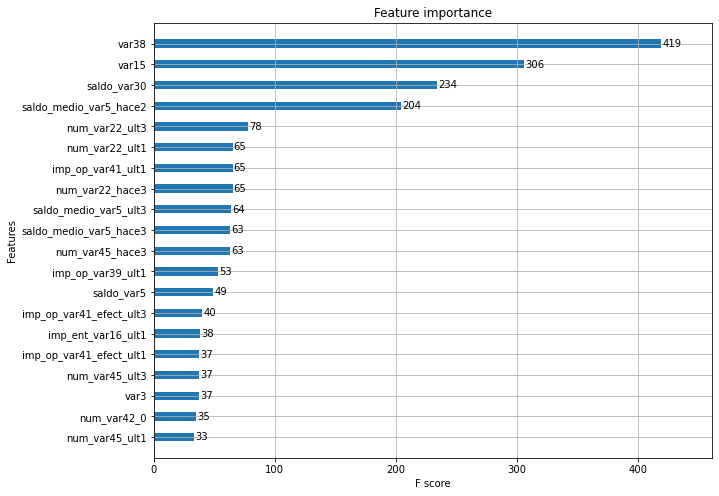

In [18]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax = ax, max_num_features = 20, height = 0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [20]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators = 500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = evals, verbose = True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1],average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

In [28]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시시키 위해, n_estimators를 200으로 감소
LGBM_clf = LGBMClassifier(n_estimators = 200)

params = {'num_leaves' : [32, 64],
          'max_depth' : [128, 160],
          'min_child_samples' : [60, 100],
          'subsample' : [0.8, 1]}

# 하이퍼 파리미터 테스트의 수행속도를 향상시키기 위해 cv를 지정하지 않음
gridcv = GridSearchCV(LGBM_clf, param_grid = params)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc', eval_set = [(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	val

[24]	valid_0's auc: 0.869979	valid_0's binary_logloss: 0.125886	valid_1's auc: 0.836766	valid_1's binary_logloss: 0.140496
[25]	valid_0's auc: 0.870956	valid_0's binary_logloss: 0.125545	valid_1's auc: 0.837001	valid_1's binary_logloss: 0.140322
[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc: 0.875873	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.140163
[30]	valid_0's auc: 0.876465	valid_0's binary_logloss: 0.123865	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.140195
[31]	valid_0's auc: 0.877699	valid_0's binary_logloss: 0.123521	valid_1's auc: 0.836229	valid_1's binary_logloss: 0.140186
[32]	valid_0's au

[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc: 0.87544	valid_0's binary_logloss: 0.124018	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.139819
[30]	valid_0's auc: 0.876222	valid_0's binary_logloss: 0.123733	valid_1's auc: 0.838003	valid_1's binary_logloss: 0.139778
[31]	valid_0's auc: 0.877142	valid_0's binary_logloss: 0.12348	valid_1's auc: 0.838078	valid_1's binary_logloss: 0.139735
[32]	valid_0's auc: 0.877956	valid_0's binary_logloss: 0.123203	valid_1's auc: 0.838002	valid_1's binary_logloss: 0.139729
[33]	valid_0's auc: 

[48]	valid_0's auc: 0.891058	valid_0's binary_logloss: 0.118665	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139409
[49]	valid_0's auc: 0.891635	valid_0's binary_logloss: 0.118425	valid_1's auc: 0.839754	valid_1's binary_logloss: 0.139428
[50]	valid_0's auc: 0.892346	valid_0's binary_logloss: 0.118168	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.139501
[51]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117984	valid_1's auc: 0.839121	valid_1's binary_logloss: 0.139524
[52]	valid_0's auc: 0.893171	valid_0's binary_logloss: 0.117764	valid_1's auc: 0.838794	valid_1's binary_logloss: 0.139586
[53]	valid_0's auc: 0.893573	valid_0's binary_logloss: 0.117568	valid_1's auc: 0.838694	valid_1's binary_logloss: 0.139581
[54]	valid_0's auc: 0.894147	valid_0's binary_logloss: 0.117322	valid_1's auc: 0.838487	valid_1's binary_logloss: 0.139606
[55]	valid_0's auc: 0.894518	valid_0's binary_logloss: 0.117157	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.139538
[56]	valid_0's a

[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc: 0.875873	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.140163
[30]	valid_0's auc: 0.876465	valid_0's binary_logloss: 0.123865	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.140195
[31]	valid_0's auc: 0.877699	valid_0's binary_logloss: 0.123521	valid_1's auc: 0.836229	valid_1's binary_logloss: 0.140186
[32]	valid_0's auc: 0.878492	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.140145
[33]	valid_0's auc: 0.879281	valid_0's binary_logloss: 0.122981	valid_1's auc: 0.836061	valid_1's binary_logloss: 0.140165
[34]	valid_0's au

[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc: 0.87544	valid_0's binary_logloss: 0.124018	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.139819
[30]	valid_0's auc: 0.876222	valid_0's binary_logloss: 0.123733	valid_1's auc: 0.838003	valid_1's binary_logloss: 0.139778
[31]	valid_0's auc: 0.877142	valid_0's binary_logloss: 0.12348	valid_1's auc: 0.838078	valid_1's binary_logloss: 0.139735
[32]	valid_0's auc: 0.877956	valid_0's binary_logloss: 0.123203	valid_1's auc: 0.838002	valid_1's binary_logloss: 0.139729
[33]	valid_0's auc: 

[48]	valid_0's auc: 0.891058	valid_0's binary_logloss: 0.118665	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139409
[49]	valid_0's auc: 0.891635	valid_0's binary_logloss: 0.118425	valid_1's auc: 0.839754	valid_1's binary_logloss: 0.139428
[50]	valid_0's auc: 0.892346	valid_0's binary_logloss: 0.118168	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.139501
[51]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117984	valid_1's auc: 0.839121	valid_1's binary_logloss: 0.139524
[52]	valid_0's auc: 0.893171	valid_0's binary_logloss: 0.117764	valid_1's auc: 0.838794	valid_1's binary_logloss: 0.139586
[53]	valid_0's auc: 0.893573	valid_0's binary_logloss: 0.117568	valid_1's auc: 0.838694	valid_1's binary_logloss: 0.139581
[54]	valid_0's auc: 0.894147	valid_0's binary_logloss: 0.117322	valid_1's auc: 0.838487	valid_1's binary_logloss: 0.139606
[55]	valid_0's auc: 0.894518	valid_0's binary_logloss: 0.117157	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.139538
[56]	valid_0's a

[19]	valid_0's auc: 0.883566	valid_0's binary_logloss: 0.122594	valid_1's auc: 0.832707	valid_1's binary_logloss: 0.141615
[20]	valid_0's auc: 0.885585	valid_0's binary_logloss: 0.121869	valid_1's auc: 0.833151	valid_1's binary_logloss: 0.141426
[21]	valid_0's auc: 0.887553	valid_0's binary_logloss: 0.121164	valid_1's auc: 0.834052	valid_1's binary_logloss: 0.141225
[22]	valid_0's auc: 0.88866	valid_0's binary_logloss: 0.120577	valid_1's auc: 0.834098	valid_1's binary_logloss: 0.141029
[23]	valid_0's auc: 0.889845	valid_0's binary_logloss: 0.11997	valid_1's auc: 0.833894	valid_1's binary_logloss: 0.140951
[24]	valid_0's auc: 0.890796	valid_0's binary_logloss: 0.119485	valid_1's auc: 0.83469	valid_1's binary_logloss: 0.140844
[25]	valid_0's auc: 0.89199	valid_0's binary_logloss: 0.118928	valid_1's auc: 0.833906	valid_1's binary_logloss: 0.140917
[26]	valid_0's auc: 0.893398	valid_0's binary_logloss: 0.118364	valid_1's auc: 0.834288	valid_1's binary_logloss: 0.140784
[27]	valid_0's auc: 

[20]	valid_0's auc: 0.884031	valid_0's binary_logloss: 0.122325	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.140381
[21]	valid_0's auc: 0.885764	valid_0's binary_logloss: 0.121625	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.140197
[22]	valid_0's auc: 0.887281	valid_0's binary_logloss: 0.120983	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.140102
[23]	valid_0's auc: 0.888433	valid_0's binary_logloss: 0.120453	valid_1's auc: 0.838981	valid_1's binary_logloss: 0.140039
[24]	valid_0's auc: 0.890216	valid_0's binary_logloss: 0.119857	valid_1's auc: 0.839006	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.891521	valid_0's binary_logloss: 0.119298	valid_1's auc: 0.83887	valid_1's binary_logloss: 0.139884
[26]	valid_0's auc: 0.892429	valid_0's binary_logloss: 0.118862	valid_1's auc: 0.838468	valid_1's binary_logloss: 0.139871
[27]	valid_0's auc: 0.893299	valid_0's binary_logloss: 0.11838	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.139845
[28]	valid_0's auc

[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_logloss: 0.145495	valid_1's auc: 0.831668	valid_1's binary_logloss: 0.155726
[4]	valid_0's auc: 0.85412	valid_0's binary_logloss: 0.142244	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.153013
[5]	valid_0's auc: 0.856985	valid_0's binary_logloss: 0.139541	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.150762
[6]	valid_0's auc: 0.860318	valid_0's binary_logloss: 0.137315	valid_1's auc: 0.834439	valid_1's binary_logloss: 0.148891
[7]	valid_0's auc: 0.862354	valid_0's binary_logloss: 0.135314	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.147306
[8]	valid_0's auc: 0.864507	valid_0's binary_logloss: 0.133588	valid_1's auc: 0.834413	

[37]	valid_0's auc: 0.90518	valid_0's binary_logloss: 0.113632	valid_1's auc: 0.833423	valid_1's binary_logloss: 0.140663
[38]	valid_0's auc: 0.905995	valid_0's binary_logloss: 0.113243	valid_1's auc: 0.83347	valid_1's binary_logloss: 0.140755
Early stopping, best iteration is:
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	valid_1's binary_logloss: 0.146192
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss: 0.142092	valid_1's auc: 0.835576	valid_1's binary_logloss: 0.152516
[5]	valid_0's auc: 0.85629	valid_0's binary_logloss:

[36]	valid_0's auc: 0.903021	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.836623	valid_1's binary_logloss: 0.139976
[37]	valid_0's auc: 0.904251	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.139975
[38]	valid_0's auc: 0.90516	valid_0's binary_logloss: 0.113675	valid_1's auc: 0.837	valid_1's binary_logloss: 0.139923
[39]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.113263	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.13986
[40]	valid_0's auc: 0.906683	valid_0's binary_logloss: 0.112912	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139857
[41]	valid_0's auc: 0.907126	valid_0's binary_logloss: 0.112589	valid_1's auc: 0.836763	valid_1's binary_logloss: 0.139978
[42]	valid_0's auc: 0.907766	valid_0's binary_logloss: 0.112228	valid_1's auc: 0.836668	valid_1's binary_logloss: 0.140037
[43]	valid_0's auc: 0.908476	valid_0's binary_logloss: 0.111878	valid_1's auc: 0.836706	valid_1's binary_logloss: 0.140074
[44]	valid_0's auc: 0.

[26]	valid_0's auc: 0.873412	valid_0's binary_logloss: 0.125313	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.139742
[27]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.124988	valid_1's auc: 0.836586	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874911	valid_0's binary_logloss: 0.124675	valid_1's auc: 0.836489	valid_1's binary_logloss: 0.139742
[29]	valid_0's auc: 0.875538	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.139712
[30]	valid_0's auc: 0.876317	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.836181	valid_1's binary_logloss: 0.139716
[31]	valid_0's auc: 0.87724	valid_0's binary_logloss: 0.123841	valid_1's auc: 0.836284	valid_1's binary_logloss: 0.139683
[32]	valid_0's auc: 0.877783	valid_0's binary_logloss: 0.123594	valid_1's auc: 0.835851	valid_1's binary_logloss: 0.139729
[33]	valid_0's auc: 0.878348	valid_0's binary_logloss: 0.12338	valid_1's auc: 0.835408	valid_1's binary_logloss: 0.139824
[34]	valid_0's auc

[26]	valid_0's auc: 0.871934	valid_0's binary_logloss: 0.12537	valid_1's auc: 0.838594	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873048	valid_0's binary_logloss: 0.125049	valid_1's auc: 0.83847	valid_1's binary_logloss: 0.139655
[28]	valid_0's auc: 0.873824	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.838229	valid_1's binary_logloss: 0.139655
[29]	valid_0's auc: 0.874662	valid_0's binary_logloss: 0.124467	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139579
[30]	valid_0's auc: 0.87542	valid_0's binary_logloss: 0.124168	valid_1's auc: 0.838156	valid_1's binary_logloss: 0.139548
[31]	valid_0's auc: 0.876207	valid_0's binary_logloss: 0.123915	valid_1's auc: 0.838237	valid_1's binary_logloss: 0.139538
[32]	valid_0's auc: 0.877156	valid_0's binary_logloss: 0.123623	valid_1's auc: 0.838271	valid_1's binary_logloss: 0.13947
[33]	valid_0's auc: 0.87768	valid_0's binary_logloss: 0.12338	valid_1's auc: 0.838713	valid_1's binary_logloss: 0.139346
[34]	valid_0's auc: 0.

[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	val

[72]	valid_0's auc: 0.89933	valid_0's binary_logloss: 0.11544	valid_1's auc: 0.843123	valid_1's binary_logloss: 0.138587
[73]	valid_0's auc: 0.899665	valid_0's binary_logloss: 0.115279	valid_1's auc: 0.843158	valid_1's binary_logloss: 0.138606
[74]	valid_0's auc: 0.899872	valid_0's binary_logloss: 0.115145	valid_1's auc: 0.843153	valid_1's binary_logloss: 0.138622
[75]	valid_0's auc: 0.900318	valid_0's binary_logloss: 0.115012	valid_1's auc: 0.8431	valid_1's binary_logloss: 0.138652
[76]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.114797	valid_1's auc: 0.843128	valid_1's binary_logloss: 0.138654
[77]	valid_0's auc: 0.901053	valid_0's binary_logloss: 0.11465	valid_1's auc: 0.843183	valid_1's binary_logloss: 0.138667
[78]	valid_0's auc: 0.901334	valid_0's binary_logloss: 0.114492	valid_1's auc: 0.843036	valid_1's binary_logloss: 0.138728
Early stopping, best iteration is:
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logl

[26]	valid_0's auc: 0.871023	valid_0's binary_logloss: 0.125636	valid_1's auc: 0.837504	valid_1's binary_logloss: 0.140165
[27]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.140044
[28]	valid_0's auc: 0.874041	valid_0's binary_logloss: 0.124866	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.14003
[29]	valid_0's auc: 0.875088	valid_0's binary_logloss: 0.12452	valid_1's auc: 0.837397	valid_1's binary_logloss: 0.140013
[30]	valid_0's auc: 0.876006	valid_0's binary_logloss: 0.124204	valid_1's auc: 0.837051	valid_1's binary_logloss: 0.140044
[31]	valid_0's auc: 0.876443	valid_0's binary_logloss: 0.123946	valid_1's auc: 0.837341	valid_1's binary_logloss: 0.139984
[32]	valid_0's auc: 0.877157	valid_0's binary_logloss: 0.123679	valid_1's auc: 0.837186	valid_1's binary_logloss: 0.139974
[33]	valid_0's auc: 0.877846	valid_0's binary_logloss: 0.123426	valid_1's auc: 0.836741	valid_1's binary_logloss: 0.140021
[34]	valid_0's auc

[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.83905

[42]	valid_0's auc: 0.885638	valid_0's binary_logloss: 0.121096	valid_1's auc: 0.843995	valid_1's binary_logloss: 0.138106
[43]	valid_0's auc: 0.886395	valid_0's binary_logloss: 0.120905	valid_1's auc: 0.844184	valid_1's binary_logloss: 0.138052
[44]	valid_0's auc: 0.887071	valid_0's binary_logloss: 0.120678	valid_1's auc: 0.844103	valid_1's binary_logloss: 0.138065
[45]	valid_0's auc: 0.887784	valid_0's binary_logloss: 0.120428	valid_1's auc: 0.844152	valid_1's binary_logloss: 0.138057
[46]	valid_0's auc: 0.888342	valid_0's binary_logloss: 0.120223	valid_1's auc: 0.844297	valid_1's binary_logloss: 0.138025
[47]	valid_0's auc: 0.888722	valid_0's binary_logloss: 0.119986	valid_1's auc: 0.844276	valid_1's binary_logloss: 0.138002
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logloss: 0.137947
[49]	valid_0's auc: 0.889545	valid_0's binary_logloss: 0.119601	valid_1's auc: 0.844447	valid_1's binary_logloss: 0.138002
[50]	valid_0's a

[37]	valid_0's auc: 0.901414	valid_0's binary_logloss: 0.115269	valid_1's auc: 0.832144	valid_1's binary_logloss: 0.14042
[38]	valid_0's auc: 0.902365	valid_0's binary_logloss: 0.114862	valid_1's auc: 0.832015	valid_1's binary_logloss: 0.140464
[39]	valid_0's auc: 0.90309	valid_0's binary_logloss: 0.114499	valid_1's auc: 0.832257	valid_1's binary_logloss: 0.140399
Early stopping, best iteration is:
[9]	valid_0's auc: 0.866024	valid_0's binary_logloss: 0.132932	valid_1's auc: 0.836913	valid_1's binary_logloss: 0.145234
[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_logloss: 0.165178
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.84496	valid_0's binary_logloss: 0.150106	valid_1's auc: 0.825101	valid_1's binary_logloss: 0.159672
[3]	valid_0's auc: 0.848339	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.829756	valid_1's binary_logloss: 0.156122
[4]	valid_0's auc: 0.852327	valid_0's binary_loglo

[34]	valid_0's auc: 0.899324	valid_0's binary_logloss: 0.116129	valid_1's auc: 0.836499	valid_1's binary_logloss: 0.139874
[35]	valid_0's auc: 0.900175	valid_0's binary_logloss: 0.11578	valid_1's auc: 0.836226	valid_1's binary_logloss: 0.139924
[36]	valid_0's auc: 0.901261	valid_0's binary_logloss: 0.115448	valid_1's auc: 0.835902	valid_1's binary_logloss: 0.13999
[37]	valid_0's auc: 0.901964	valid_0's binary_logloss: 0.115083	valid_1's auc: 0.835674	valid_1's binary_logloss: 0.14012
[38]	valid_0's auc: 0.902511	valid_0's binary_logloss: 0.114769	valid_1's auc: 0.835307	valid_1's binary_logloss: 0.140207
Early stopping, best iteration is:
[8]	valid_0's auc: 0.863565	valid_0's binary_logloss: 0.134173	valid_1's auc: 0.838026	valid_1's binary_logloss: 0.145898
[1]	valid_0's auc: 0.831709	valid_0's binary_logloss: 0.155602	valid_1's auc: 0.817142	valid_1's binary_logloss: 0.164826
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845013	valid_0's binary_log

[18]	valid_0's auc: 0.880601	valid_0's binary_logloss: 0.124364	valid_1's auc: 0.837466	valid_1's binary_logloss: 0.140701
[19]	valid_0's auc: 0.88248	valid_0's binary_logloss: 0.123621	valid_1's auc: 0.838247	valid_1's binary_logloss: 0.140429
[20]	valid_0's auc: 0.883936	valid_0's binary_logloss: 0.122911	valid_1's auc: 0.83793	valid_1's binary_logloss: 0.140317
[21]	valid_0's auc: 0.88529	valid_0's binary_logloss: 0.122327	valid_1's auc: 0.838792	valid_1's binary_logloss: 0.140098
[22]	valid_0's auc: 0.88648	valid_0's binary_logloss: 0.121732	valid_1's auc: 0.838403	valid_1's binary_logloss: 0.139974
[23]	valid_0's auc: 0.887765	valid_0's binary_logloss: 0.121176	valid_1's auc: 0.838404	valid_1's binary_logloss: 0.139891
[24]	valid_0's auc: 0.888887	valid_0's binary_logloss: 0.120591	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.890044	valid_0's binary_logloss: 0.120074	valid_1's auc: 0.838114	valid_1's binary_logloss: 0.139883
[26]	valid_0's auc: 

[19]	valid_0's auc: 0.881986	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.834979	valid_1's binary_logloss: 0.140974
[20]	valid_0's auc: 0.883497	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.834694	valid_1's binary_logloss: 0.140833
[21]	valid_0's auc: 0.88477	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.83413	valid_1's binary_logloss: 0.140756
[22]	valid_0's auc: 0.886052	valid_0's binary_logloss: 0.121963	valid_1's auc: 0.833448	valid_1's binary_logloss: 0.140744
[23]	valid_0's auc: 0.88729	valid_0's binary_logloss: 0.121374	valid_1's auc: 0.832949	valid_1's binary_logloss: 0.140705
[24]	valid_0's auc: 0.888202	valid_0's binary_logloss: 0.120845	valid_1's auc: 0.832423	valid_1's binary_logloss: 0.140716
[25]	valid_0's auc: 0.889261	valid_0's binary_logloss: 0.120276	valid_1's auc: 0.832717	valid_1's binary_logloss: 0.140524
[26]	valid_0's auc: 0.89008	valid_0's binary_logloss: 0.119792	valid_1's auc: 0.832126	valid_1's binary_logloss: 0.140541
[27]	valid_0's auc: 

[19]	valid_0's auc: 0.880771	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.836922	valid_1's binary_logloss: 0.140454
[20]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.123001	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.140307
[21]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.140209
[22]	valid_0's auc: 0.885371	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.140165
[23]	valid_0's auc: 0.886707	valid_0's binary_logloss: 0.121228	valid_1's auc: 0.836743	valid_1's binary_logloss: 0.140035
[24]	valid_0's auc: 0.887902	valid_0's binary_logloss: 0.120685	valid_1's auc: 0.83666	valid_1's binary_logloss: 0.139977
[25]	valid_0's auc: 0.889092	valid_0's binary_logloss: 0.12018	valid_1's auc: 0.83633	valid_1's binary_logloss: 0.139976
[26]	valid_0's auc: 0.890287	valid_0's binary_logloss: 0.119694	valid_1's auc: 0.836088	valid_1's binary_logloss: 0.13994
[27]	valid_0's auc: 0

[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_logloss: 0.145958	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.155738
[4]	valid_0's auc: 0.851924	valid_0's binary_logloss: 0.142678	valid_1's auc: 0.834388	valid_1's binary_logloss: 0.152853
[5]	valid_0's auc: 0.854459	valid_0's binary_logloss: 0.140096	valid_1's auc: 0.834654	valid_1's binary_logloss: 0.150614
[6]	valid_0's auc: 0.860195	valid_0's binary_logloss: 0.137818	valid_1's auc: 0.837402	valid_1's binary_logloss: 0.148623
[7]	valid_0's auc: 0.861877	valid_0's binary_logloss: 0.135948	valid_1's auc: 0.837505	valid_1's binary_logloss: 0.14706
[8]	valid_0's auc: 0.863997	valid_0's binary_logloss: 0.134369	valid_1's auc: 0.837955

[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82966	valid_0's binary_logloss: 0.150925	valid_1's auc: 0.826326	valid_1's binary_logloss: 0.159774
[3]	valid_0's auc: 0.834498	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826852	valid_1's binary_logloss: 0.156113
[4]	valid_0's auc: 0.83904	valid_0's binary_logloss: 0.144173	valid_1's auc: 0.831417	valid_1's binary_logloss: 0.153186
[5]	valid_0's auc: 0.841964	valid_0's binary_logloss: 0.141745	valid_1's auc: 0.834593	valid_1's binary_logloss: 0.150797
[6]	valid_0's auc: 0.845253	valid_0's binary_logloss: 0.139712	valid_1's auc: 0.836659	valid_1's binary_logloss: 0.149062
[7]	valid_0's auc: 0.846545	valid_0's binary_logloss: 0.138053	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.147537
[8]	valid_0's auc: 0.848885	valid_0's binary_logloss: 0.1366	valid_1's auc: 0.838153	val

[25]	valid_0's auc: 0.870956	valid_0's binary_logloss: 0.125545	valid_1's auc: 0.837001	valid_1's binary_logloss: 0.140322
[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc: 0.875873	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.140163
[30]	valid_0's auc: 0.876465	valid_0's binary_logloss: 0.123865	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.140195
[31]	valid_0's auc: 0.877699	valid_0's binary_logloss: 0.123521	valid_1's auc: 0.836229	valid_1's binary_logloss: 0.140186
[32]	valid_0's auc: 0.878492	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.140145
[33]	valid_0's au

[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc: 0.87544	valid_0's binary_logloss: 0.124018	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.139819
[30]	valid_0's auc: 0.876222	valid_0's binary_logloss: 0.123733	valid_1's auc: 0.838003	valid_1's binary_logloss: 0.139778
[31]	valid_0's auc: 0.877142	valid_0's binary_logloss: 0.12348	valid_1's auc: 0.838078	valid_1's binary_logloss: 0.139735
[32]	valid_0's auc: 

[47]	valid_0's auc: 0.890678	valid_0's binary_logloss: 0.118869	valid_1's auc: 0.839761	valid_1's binary_logloss: 0.1394
[48]	valid_0's auc: 0.891058	valid_0's binary_logloss: 0.118665	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139409
[49]	valid_0's auc: 0.891635	valid_0's binary_logloss: 0.118425	valid_1's auc: 0.839754	valid_1's binary_logloss: 0.139428
[50]	valid_0's auc: 0.892346	valid_0's binary_logloss: 0.118168	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.139501
[51]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117984	valid_1's auc: 0.839121	valid_1's binary_logloss: 0.139524
[52]	valid_0's auc: 0.893171	valid_0's binary_logloss: 0.117764	valid_1's auc: 0.838794	valid_1's binary_logloss: 0.139586
[53]	valid_0's auc: 0.893573	valid_0's binary_logloss: 0.117568	valid_1's auc: 0.838694	valid_1's binary_logloss: 0.139581
[54]	valid_0's auc: 0.894147	valid_0's binary_logloss: 0.117322	valid_1's auc: 0.838487	valid_1's binary_logloss: 0.139606
[55]	valid_0's auc

[24]	valid_0's auc: 0.869979	valid_0's binary_logloss: 0.125886	valid_1's auc: 0.836766	valid_1's binary_logloss: 0.140496
[25]	valid_0's auc: 0.870956	valid_0's binary_logloss: 0.125545	valid_1's auc: 0.837001	valid_1's binary_logloss: 0.140322
[26]	valid_0's auc: 0.872886	valid_0's binary_logloss: 0.125108	valid_1's auc: 0.836911	valid_1's binary_logloss: 0.140274
[27]	valid_0's auc: 0.873971	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.836733	valid_1's binary_logloss: 0.140247
[28]	valid_0's auc: 0.875129	valid_0's binary_logloss: 0.124434	valid_1's auc: 0.837012	valid_1's binary_logloss: 0.140143
[29]	valid_0's auc: 0.875873	valid_0's binary_logloss: 0.12414	valid_1's auc: 0.836866	valid_1's binary_logloss: 0.140163
[30]	valid_0's auc: 0.876465	valid_0's binary_logloss: 0.123865	valid_1's auc: 0.836337	valid_1's binary_logloss: 0.140195
[31]	valid_0's auc: 0.877699	valid_0's binary_logloss: 0.123521	valid_1's auc: 0.836229	valid_1's binary_logloss: 0.140186
[32]	valid_0's au

[24]	valid_0's auc: 0.871076	valid_0's binary_logloss: 0.125665	valid_1's auc: 0.838918	valid_1's binary_logloss: 0.139963
[25]	valid_0's auc: 0.871808	valid_0's binary_logloss: 0.12529	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139886
[26]	valid_0's auc: 0.872679	valid_0's binary_logloss: 0.124953	valid_1's auc: 0.838853	valid_1's binary_logloss: 0.139811
[27]	valid_0's auc: 0.873565	valid_0's binary_logloss: 0.124623	valid_1's auc: 0.838679	valid_1's binary_logloss: 0.139786
[28]	valid_0's auc: 0.874397	valid_0's binary_logloss: 0.124307	valid_1's auc: 0.83805	valid_1's binary_logloss: 0.139815
[29]	valid_0's auc: 0.87544	valid_0's binary_logloss: 0.124018	valid_1's auc: 0.837719	valid_1's binary_logloss: 0.139819
[30]	valid_0's auc: 0.876222	valid_0's binary_logloss: 0.123733	valid_1's auc: 0.838003	valid_1's binary_logloss: 0.139778
[31]	valid_0's auc: 0.877142	valid_0's binary_logloss: 0.12348	valid_1's auc: 0.838078	valid_1's binary_logloss: 0.139735
[32]	valid_0's auc: 

[48]	valid_0's auc: 0.891058	valid_0's binary_logloss: 0.118665	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139409
[49]	valid_0's auc: 0.891635	valid_0's binary_logloss: 0.118425	valid_1's auc: 0.839754	valid_1's binary_logloss: 0.139428
[50]	valid_0's auc: 0.892346	valid_0's binary_logloss: 0.118168	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.139501
[51]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117984	valid_1's auc: 0.839121	valid_1's binary_logloss: 0.139524
[52]	valid_0's auc: 0.893171	valid_0's binary_logloss: 0.117764	valid_1's auc: 0.838794	valid_1's binary_logloss: 0.139586
[53]	valid_0's auc: 0.893573	valid_0's binary_logloss: 0.117568	valid_1's auc: 0.838694	valid_1's binary_logloss: 0.139581
[54]	valid_0's auc: 0.894147	valid_0's binary_logloss: 0.117322	valid_1's auc: 0.838487	valid_1's binary_logloss: 0.139606
[55]	valid_0's auc: 0.894518	valid_0's binary_logloss: 0.117157	valid_1's auc: 0.838831	valid_1's binary_logloss: 0.139538
[56]	valid_0's a

[19]	valid_0's auc: 0.883566	valid_0's binary_logloss: 0.122594	valid_1's auc: 0.832707	valid_1's binary_logloss: 0.141615
[20]	valid_0's auc: 0.885585	valid_0's binary_logloss: 0.121869	valid_1's auc: 0.833151	valid_1's binary_logloss: 0.141426
[21]	valid_0's auc: 0.887553	valid_0's binary_logloss: 0.121164	valid_1's auc: 0.834052	valid_1's binary_logloss: 0.141225
[22]	valid_0's auc: 0.88866	valid_0's binary_logloss: 0.120577	valid_1's auc: 0.834098	valid_1's binary_logloss: 0.141029
[23]	valid_0's auc: 0.889845	valid_0's binary_logloss: 0.11997	valid_1's auc: 0.833894	valid_1's binary_logloss: 0.140951
[24]	valid_0's auc: 0.890796	valid_0's binary_logloss: 0.119485	valid_1's auc: 0.83469	valid_1's binary_logloss: 0.140844
[25]	valid_0's auc: 0.89199	valid_0's binary_logloss: 0.118928	valid_1's auc: 0.833906	valid_1's binary_logloss: 0.140917
[26]	valid_0's auc: 0.893398	valid_0's binary_logloss: 0.118364	valid_1's auc: 0.834288	valid_1's binary_logloss: 0.140784
[27]	valid_0's auc: 

[20]	valid_0's auc: 0.884031	valid_0's binary_logloss: 0.122325	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.140381
[21]	valid_0's auc: 0.885764	valid_0's binary_logloss: 0.121625	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.140197
[22]	valid_0's auc: 0.887281	valid_0's binary_logloss: 0.120983	valid_1's auc: 0.839359	valid_1's binary_logloss: 0.140102
[23]	valid_0's auc: 0.888433	valid_0's binary_logloss: 0.120453	valid_1's auc: 0.838981	valid_1's binary_logloss: 0.140039
[24]	valid_0's auc: 0.890216	valid_0's binary_logloss: 0.119857	valid_1's auc: 0.839006	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.891521	valid_0's binary_logloss: 0.119298	valid_1's auc: 0.83887	valid_1's binary_logloss: 0.139884
[26]	valid_0's auc: 0.892429	valid_0's binary_logloss: 0.118862	valid_1's auc: 0.838468	valid_1's binary_logloss: 0.139871
[27]	valid_0's auc: 0.893299	valid_0's binary_logloss: 0.11838	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.139845
[28]	valid_0's auc

[1]	valid_0's auc: 0.832025	valid_0's binary_logloss: 0.155465	valid_1's auc: 0.820076	valid_1's binary_logloss: 0.164546
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.844878	valid_0's binary_logloss: 0.14969	valid_1's auc: 0.828857	valid_1's binary_logloss: 0.159283
[3]	valid_0's auc: 0.848608	valid_0's binary_logloss: 0.145495	valid_1's auc: 0.831668	valid_1's binary_logloss: 0.155726
[4]	valid_0's auc: 0.85412	valid_0's binary_logloss: 0.142244	valid_1's auc: 0.832954	valid_1's binary_logloss: 0.153013
[5]	valid_0's auc: 0.856985	valid_0's binary_logloss: 0.139541	valid_1's auc: 0.834294	valid_1's binary_logloss: 0.150762
[6]	valid_0's auc: 0.860318	valid_0's binary_logloss: 0.137315	valid_1's auc: 0.834439	valid_1's binary_logloss: 0.148891
[7]	valid_0's auc: 0.862354	valid_0's binary_logloss: 0.135314	valid_1's auc: 0.835254	valid_1's binary_logloss: 0.147306
[8]	valid_0's auc: 0.864507	valid_0's binary_logloss: 0.133588	valid_1's auc: 0.834413	

[36]	valid_0's auc: 0.90428	valid_0's binary_logloss: 0.114027	valid_1's auc: 0.833146	valid_1's binary_logloss: 0.140714
[37]	valid_0's auc: 0.90518	valid_0's binary_logloss: 0.113632	valid_1's auc: 0.833423	valid_1's binary_logloss: 0.140663
[38]	valid_0's auc: 0.905995	valid_0's binary_logloss: 0.113243	valid_1's auc: 0.83347	valid_1's binary_logloss: 0.140755
Early stopping, best iteration is:
[8]	valid_0's auc: 0.865325	valid_0's binary_logloss: 0.133564	valid_1's auc: 0.83904	valid_1's binary_logloss: 0.146192
[1]	valid_0's auc: 0.833919	valid_0's binary_logloss: 0.155512	valid_1's auc: 0.820637	valid_1's binary_logloss: 0.164643
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842002	valid_0's binary_logloss: 0.149635	valid_1's auc: 0.827273	valid_1's binary_logloss: 0.15926
[3]	valid_0's auc: 0.844839	valid_0's binary_logloss: 0.145363	valid_1's auc: 0.829328	valid_1's binary_logloss: 0.155446
[4]	valid_0's auc: 0.851547	valid_0's binary_logloss

[36]	valid_0's auc: 0.903021	valid_0's binary_logloss: 0.114415	valid_1's auc: 0.836623	valid_1's binary_logloss: 0.139976
[37]	valid_0's auc: 0.904251	valid_0's binary_logloss: 0.114061	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.139975
[38]	valid_0's auc: 0.90516	valid_0's binary_logloss: 0.113675	valid_1's auc: 0.837	valid_1's binary_logloss: 0.139923
[39]	valid_0's auc: 0.90596	valid_0's binary_logloss: 0.113263	valid_1's auc: 0.837387	valid_1's binary_logloss: 0.13986
[40]	valid_0's auc: 0.906683	valid_0's binary_logloss: 0.112912	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139857
[41]	valid_0's auc: 0.907126	valid_0's binary_logloss: 0.112589	valid_1's auc: 0.836763	valid_1's binary_logloss: 0.139978
[42]	valid_0's auc: 0.907766	valid_0's binary_logloss: 0.112228	valid_1's auc: 0.836668	valid_1's binary_logloss: 0.140037
[43]	valid_0's auc: 0.908476	valid_0's binary_logloss: 0.111878	valid_1's auc: 0.836706	valid_1's binary_logloss: 0.140074
[44]	valid_0's auc: 0.

[22]	valid_0's auc: 0.868689	valid_0's binary_logloss: 0.126832	valid_1's auc: 0.837975	valid_1's binary_logloss: 0.139969
[23]	valid_0's auc: 0.869773	valid_0's binary_logloss: 0.126451	valid_1's auc: 0.837722	valid_1's binary_logloss: 0.139931
[24]	valid_0's auc: 0.871205	valid_0's binary_logloss: 0.12605	valid_1's auc: 0.837453	valid_1's binary_logloss: 0.139824
[25]	valid_0's auc: 0.871806	valid_0's binary_logloss: 0.125728	valid_1's auc: 0.837283	valid_1's binary_logloss: 0.13976
[26]	valid_0's auc: 0.873412	valid_0's binary_logloss: 0.125313	valid_1's auc: 0.836946	valid_1's binary_logloss: 0.139742
[27]	valid_0's auc: 0.874137	valid_0's binary_logloss: 0.124988	valid_1's auc: 0.836586	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874911	valid_0's binary_logloss: 0.124675	valid_1's auc: 0.836489	valid_1's binary_logloss: 0.139742
[29]	valid_0's auc: 0.875538	valid_0's binary_logloss: 0.124397	valid_1's auc: 0.836554	valid_1's binary_logloss: 0.139712
[30]	valid_0's auc

[23]	valid_0's auc: 0.869543	valid_0's binary_logloss: 0.126412	valid_1's auc: 0.839032	valid_1's binary_logloss: 0.139916
[24]	valid_0's auc: 0.870296	valid_0's binary_logloss: 0.126025	valid_1's auc: 0.839048	valid_1's binary_logloss: 0.139785
[25]	valid_0's auc: 0.871119	valid_0's binary_logloss: 0.125654	valid_1's auc: 0.83856	valid_1's binary_logloss: 0.139743
[26]	valid_0's auc: 0.871934	valid_0's binary_logloss: 0.12537	valid_1's auc: 0.838594	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873048	valid_0's binary_logloss: 0.125049	valid_1's auc: 0.83847	valid_1's binary_logloss: 0.139655
[28]	valid_0's auc: 0.873824	valid_0's binary_logloss: 0.124767	valid_1's auc: 0.838229	valid_1's binary_logloss: 0.139655
[29]	valid_0's auc: 0.874662	valid_0's binary_logloss: 0.124467	valid_1's auc: 0.838445	valid_1's binary_logloss: 0.139579
[30]	valid_0's auc: 0.87542	valid_0's binary_logloss: 0.124168	valid_1's auc: 0.838156	valid_1's binary_logloss: 0.139548
[31]	valid_0's auc: 

[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829931	valid_0's binary_logloss: 0.151227	valid_1's auc: 0.824213	valid_1's binary_logloss: 0.159973
[3]	valid_0's auc: 0.835788	valid_0's binary_logloss: 0.147372	valid_1's auc: 0.829555	valid_1's binary_logloss: 0.156407
[4]	valid_0's auc: 0.842398	valid_0's binary_logloss: 0.14436	valid_1's auc: 0.833204	valid_1's binary_logloss: 0.153426
[5]	valid_0's auc: 0.84472	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.835438	valid_1's binary_logloss: 0.15118
[6]	valid_0's auc: 0.846873	valid_0's binary_logloss: 0.13984	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.149232
[7]	valid_0's auc: 0.849397	valid_0's binary_logloss: 0.138081	valid_1's auc: 0.838165	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.850636	valid_0's binary_logloss: 0.136651	valid_1's auc: 0.839203	val

[72]	valid_0's auc: 0.89933	valid_0's binary_logloss: 0.11544	valid_1's auc: 0.843123	valid_1's binary_logloss: 0.138587
[73]	valid_0's auc: 0.899665	valid_0's binary_logloss: 0.115279	valid_1's auc: 0.843158	valid_1's binary_logloss: 0.138606
[74]	valid_0's auc: 0.899872	valid_0's binary_logloss: 0.115145	valid_1's auc: 0.843153	valid_1's binary_logloss: 0.138622
[75]	valid_0's auc: 0.900318	valid_0's binary_logloss: 0.115012	valid_1's auc: 0.8431	valid_1's binary_logloss: 0.138652
[76]	valid_0's auc: 0.900838	valid_0's binary_logloss: 0.114797	valid_1's auc: 0.843128	valid_1's binary_logloss: 0.138654
[77]	valid_0's auc: 0.901053	valid_0's binary_logloss: 0.11465	valid_1's auc: 0.843183	valid_1's binary_logloss: 0.138667
[78]	valid_0's auc: 0.901334	valid_0's binary_logloss: 0.114492	valid_1's auc: 0.843036	valid_1's binary_logloss: 0.138728
Early stopping, best iteration is:
[48]	valid_0's auc: 0.889206	valid_0's binary_logloss: 0.119781	valid_1's auc: 0.844708	valid_1's binary_logl

[27]	valid_0's auc: 0.872756	valid_0's binary_logloss: 0.125201	valid_1's auc: 0.837762	valid_1's binary_logloss: 0.140044
[28]	valid_0's auc: 0.874041	valid_0's binary_logloss: 0.124866	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.14003
[29]	valid_0's auc: 0.875088	valid_0's binary_logloss: 0.12452	valid_1's auc: 0.837397	valid_1's binary_logloss: 0.140013
[30]	valid_0's auc: 0.876006	valid_0's binary_logloss: 0.124204	valid_1's auc: 0.837051	valid_1's binary_logloss: 0.140044
[31]	valid_0's auc: 0.876443	valid_0's binary_logloss: 0.123946	valid_1's auc: 0.837341	valid_1's binary_logloss: 0.139984
[32]	valid_0's auc: 0.877157	valid_0's binary_logloss: 0.123679	valid_1's auc: 0.837186	valid_1's binary_logloss: 0.139974
[33]	valid_0's auc: 0.877846	valid_0's binary_logloss: 0.123426	valid_1's auc: 0.836741	valid_1's binary_logloss: 0.140021
[34]	valid_0's auc: 0.879036	valid_0's binary_logloss: 0.123124	valid_1's auc: 0.836345	valid_1's binary_logloss: 0.140057
[35]	valid_0's auc

[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.831432	valid_0's binary_logloss: 0.151096	valid_1's auc: 0.822806	valid_1's binary_logloss: 0.160035
[3]	valid_0's auc: 0.837942	valid_0's binary_logloss: 0.147265	valid_1's auc: 0.827733	valid_1's binary_logloss: 0.156278
[4]	valid_0's auc: 0.842228	valid_0's binary_logloss: 0.144266	valid_1's auc: 0.833199	valid_1's binary_logloss: 0.153439
[5]	valid_0's auc: 0.845913	valid_0's binary_logloss: 0.141908	valid_1's auc: 0.836078	valid_1's binary_logloss: 0.151112
[6]	valid_0's auc: 0.847301	valid_0's binary_logloss: 0.139924	valid_1's auc: 0.837962	valid_1's binary_logloss: 0.149212
[7]	valid_0's auc: 0.848494	valid_0's binary_logloss: 0.138267	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.147687
[8]	valid_0's auc: 0.849608	valid_0's binary_logloss: 0.136839	valid_1's auc: 0.83905

[26]	valid_0's auc: 0.872932	valid_0's binary_logloss: 0.125379	valid_1's auc: 0.842821	valid_1's binary_logloss: 0.139002
[27]	valid_0's auc: 0.873488	valid_0's binary_logloss: 0.125055	valid_1's auc: 0.842803	valid_1's binary_logloss: 0.138866
[28]	valid_0's auc: 0.874282	valid_0's binary_logloss: 0.124763	valid_1's auc: 0.842697	valid_1's binary_logloss: 0.138796
[29]	valid_0's auc: 0.875185	valid_0's binary_logloss: 0.124481	valid_1's auc: 0.843506	valid_1's binary_logloss: 0.138625
[30]	valid_0's auc: 0.875805	valid_0's binary_logloss: 0.124216	valid_1's auc: 0.843564	valid_1's binary_logloss: 0.138532
[31]	valid_0's auc: 0.877289	valid_0's binary_logloss: 0.123898	valid_1's auc: 0.84385	valid_1's binary_logloss: 0.138455
[32]	valid_0's auc: 0.878137	valid_0's binary_logloss: 0.123613	valid_1's auc: 0.843943	valid_1's binary_logloss: 0.138401
[33]	valid_0's auc: 0.879141	valid_0's binary_logloss: 0.123349	valid_1's auc: 0.843945	valid_1's binary_logloss: 0.13837
[34]	valid_0's auc

[20]	valid_0's auc: 0.883497	valid_0's binary_logloss: 0.123057	valid_1's auc: 0.834694	valid_1's binary_logloss: 0.140833
[21]	valid_0's auc: 0.88477	valid_0's binary_logloss: 0.122502	valid_1's auc: 0.83413	valid_1's binary_logloss: 0.140756
[22]	valid_0's auc: 0.886052	valid_0's binary_logloss: 0.121963	valid_1's auc: 0.833448	valid_1's binary_logloss: 0.140744
[23]	valid_0's auc: 0.88729	valid_0's binary_logloss: 0.121374	valid_1's auc: 0.832949	valid_1's binary_logloss: 0.140705
[24]	valid_0's auc: 0.888202	valid_0's binary_logloss: 0.120845	valid_1's auc: 0.832423	valid_1's binary_logloss: 0.140716
[25]	valid_0's auc: 0.889261	valid_0's binary_logloss: 0.120276	valid_1's auc: 0.832717	valid_1's binary_logloss: 0.140524
[26]	valid_0's auc: 0.89008	valid_0's binary_logloss: 0.119792	valid_1's auc: 0.832126	valid_1's binary_logloss: 0.140541
[27]	valid_0's auc: 0.891071	valid_0's binary_logloss: 0.119365	valid_1's auc: 0.832245	valid_1's binary_logloss: 0.140458
[28]	valid_0's auc: 

[20]	valid_0's auc: 0.882476	valid_0's binary_logloss: 0.123001	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.140307
[21]	valid_0's auc: 0.883998	valid_0's binary_logloss: 0.122399	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.140209
[22]	valid_0's auc: 0.885371	valid_0's binary_logloss: 0.121789	valid_1's auc: 0.836641	valid_1's binary_logloss: 0.140165
[23]	valid_0's auc: 0.886707	valid_0's binary_logloss: 0.121228	valid_1's auc: 0.836743	valid_1's binary_logloss: 0.140035
[24]	valid_0's auc: 0.887902	valid_0's binary_logloss: 0.120685	valid_1's auc: 0.83666	valid_1's binary_logloss: 0.139977
[25]	valid_0's auc: 0.889092	valid_0's binary_logloss: 0.12018	valid_1's auc: 0.83633	valid_1's binary_logloss: 0.139976
[26]	valid_0's auc: 0.890287	valid_0's binary_logloss: 0.119694	valid_1's auc: 0.836088	valid_1's binary_logloss: 0.13994
[27]	valid_0's auc: 0.891557	valid_0's binary_logloss: 0.11921	valid_1's auc: 0.836095	valid_1's binary_logloss: 0.139925
[28]	valid_0's auc: 0.

[52]	valid_0's auc: 0.907054	valid_0's binary_logloss: 0.111647	valid_1's auc: 0.835498	valid_1's binary_logloss: 0.14054
Early stopping, best iteration is:
[22]	valid_0's auc: 0.883759	valid_0's binary_logloss: 0.122627	valid_1's auc: 0.840172	valid_1's binary_logloss: 0.139783
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845573	valid_0's binary_logloss: 0.150188	valid_1's auc: 0.832252	valid_1's binary_logloss: 0.159476
[3]	valid_0's auc: 0.848609	valid_0's binary_logloss: 0.145958	valid_1's auc: 0.834138	valid_1's binary_logloss: 0.155738
[4]	valid_0's auc: 0.851924	valid_0's binary_logloss: 0.142678	valid_1's auc: 0.834388	valid_1's binary_logloss: 0.152853
[5]	valid_0's auc: 0.854459	valid_0's binary_logloss: 0.140096	valid_1's auc: 0.834654	valid_1's binary_logloss: 0.150614
[6]	valid_0's auc: 0.860195	valid_0's binary_logl

[70]	valid_0's auc: 0.919498	valid_0's binary_logloss: 0.105505	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.140912
[71]	valid_0's auc: 0.919774	valid_0's binary_logloss: 0.105296	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.141016
Early stopping, best iteration is:
[41]	valid_0's auc: 0.905119	valid_0's binary_logloss: 0.113454	valid_1's auc: 0.839726	valid_1's binary_logloss: 0.139429
[1]	valid_0's auc: 0.833136	valid_0's binary_logloss: 0.155618	valid_1's auc: 0.823516	valid_1's binary_logloss: 0.164757
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842036	valid_0's binary_logloss: 0.149972	valid_1's auc: 0.826285	valid_1's binary_logloss: 0.159717
[3]	valid_0's auc: 0.847172	valid_0's binary_logloss: 0.145999	valid_1's auc: 0.830898	valid_1's binary_logloss: 0.156155
[4]	valid_0's auc: 0.854159	valid_0's binary_logloss: 0.142767	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.153226
[5]	valid_0's auc: 0.857704	valid_0's binary_lo

[34]	valid_0's auc: 0.899579	valid_0's binary_logloss: 0.11632	valid_1's auc: 0.832478	valid_1's binary_logloss: 0.14074
[35]	valid_0's auc: 0.900941	valid_0's binary_logloss: 0.115884	valid_1's auc: 0.83257	valid_1's binary_logloss: 0.140703
[36]	valid_0's auc: 0.902074	valid_0's binary_logloss: 0.115452	valid_1's auc: 0.832369	valid_1's binary_logloss: 0.140774
[37]	valid_0's auc: 0.902849	valid_0's binary_logloss: 0.115101	valid_1's auc: 0.832046	valid_1's binary_logloss: 0.140792
Early stopping, best iteration is:
[7]	valid_0's auc: 0.862074	valid_0's binary_logloss: 0.135927	valid_1's auc: 0.837932	valid_1's binary_logloss: 0.147666
[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845934	valid_0's binary_logloss: 0.150048	valid_1's auc: 0.831027	valid_1's binary_logloss: 0.159506
[3]	valid_0's auc: 0.849836	valid_0's binary_logl

[37]	valid_0's auc: 0.898253	valid_0's binary_logloss: 0.116123	valid_1's auc: 0.837235	valid_1's binary_logloss: 0.139781
[38]	valid_0's auc: 0.898964	valid_0's binary_logloss: 0.115828	valid_1's auc: 0.836835	valid_1's binary_logloss: 0.139841
[39]	valid_0's auc: 0.89972	valid_0's binary_logloss: 0.115476	valid_1's auc: 0.836629	valid_1's binary_logloss: 0.13991
[40]	valid_0's auc: 0.900293	valid_0's binary_logloss: 0.115122	valid_1's auc: 0.837147	valid_1's binary_logloss: 0.139846
[41]	valid_0's auc: 0.900934	valid_0's binary_logloss: 0.114813	valid_1's auc: 0.836986	valid_1's binary_logloss: 0.139923
[42]	valid_0's auc: 0.901636	valid_0's binary_logloss: 0.114489	valid_1's auc: 0.836537	valid_1's binary_logloss: 0.140017
[43]	valid_0's auc: 0.90272	valid_0's binary_logloss: 0.114161	valid_1's auc: 0.836588	valid_1's binary_logloss: 0.140025
[44]	valid_0's auc: 0.903084	valid_0's binary_logloss: 0.113909	valid_1's auc: 0.836634	valid_1's binary_logloss: 0.140037
[45]	valid_0's auc:

[67]	valid_0's auc: 0.918245	valid_0's binary_logloss: 0.106235	valid_1's auc: 0.835775	valid_1's binary_logloss: 0.140673
[68]	valid_0's auc: 0.918757	valid_0's binary_logloss: 0.105956	valid_1's auc: 0.8357	valid_1's binary_logloss: 0.140696
[69]	valid_0's auc: 0.919319	valid_0's binary_logloss: 0.105704	valid_1's auc: 0.83538	valid_1's binary_logloss: 0.140788
[70]	valid_0's auc: 0.919498	valid_0's binary_logloss: 0.105505	valid_1's auc: 0.834956	valid_1's binary_logloss: 0.140912
[71]	valid_0's auc: 0.919774	valid_0's binary_logloss: 0.105296	valid_1's auc: 0.834571	valid_1's binary_logloss: 0.141016
Early stopping, best iteration is:
[41]	valid_0's auc: 0.905119	valid_0's binary_logloss: 0.113454	valid_1's auc: 0.839726	valid_1's binary_logloss: 0.139429
[1]	training's auc: 0.823615	training's binary_logloss: 0.15611	valid_1's auc: 0.816534	valid_1's binary_logloss: 0.165167
Training until validation scores don't improve for 30 rounds
[2]	training's auc: 0.828024	training's binary

In [31]:
lgbm_clf = LGBMClassifier(n_estimators = 1000, num_leaves = 32, subsample = 0.8, min_child_samples = 60, max_depth = 128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'auc', eval_set = evals, verbose = True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:, 1], average = 'macro')
print('ROC AUC : {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.816534	valid_0's binary_logloss: 0.165167
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81932	valid_0's binary_logloss: 0.160019
[3]	valid_0's auc: 0.827935	valid_0's binary_logloss: 0.156362
[4]	valid_0's auc: 0.833269	valid_0's binary_logloss: 0.153469
[5]	valid_0's auc: 0.83486	valid_0's binary_logloss: 0.151262
[6]	valid_0's auc: 0.836656	valid_0's binary_logloss: 0.149439
[7]	valid_0's auc: 0.838769	valid_0's binary_logloss: 0.147844
[8]	valid_0's auc: 0.839353	valid_0's binary_logloss: 0.146502
[9]	valid_0's auc: 0.839985	valid_0's binary_logloss: 0.145462
[10]	valid_0's auc: 0.8401	valid_0's binary_logloss: 0.144512
[11]	valid_0's auc: 0.840377	valid_0's binary_logloss: 0.14369
[12]	valid_0's auc: 0.840823	valid_0's binary_logloss: 0.143055
[13]	valid_0's auc: 0.840551	valid_0's binary_logloss: 0.142537
[14]	valid_0's auc: 0.8399	valid_0's binary_logloss: 0.142111
[15]	valid_0's auc: 0.839069	valid_0's binary_logloss: 0.1

ROC AUC : 0.8418
